<a href="https://www.kaggle.com/code/jaikrishna612/brain-mri-cnn?scriptVersionId=118792122" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [663]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense

In [664]:
#os.listdir()

In [665]:
os.listdir("/kaggle/input/brain-mri-images-for-brain-tumor-detection")

['no', 'yes', 'brain_tumor_dataset']

In [666]:
classes = ['no','yes']
def cs_images(path,classes):
    imag = []
    label = []
    for i in classes:
        l1 = os.listdir(path+'/'+i)
        for j in l1:
            img = Image.open(path+'/'+i+'/'+j)
            img = img.resize(size = (28,28))
            img = img.convert('L')
            #img = img.reshape(50,50,1)
            #img = img.flatten()
            img = np.array(img)
            img = img.reshape(28,28,1)
            imag.append(img)
            label.append(classes.index(i))
            del(img)
    %matplotlib inline 
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(imag[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imag),label

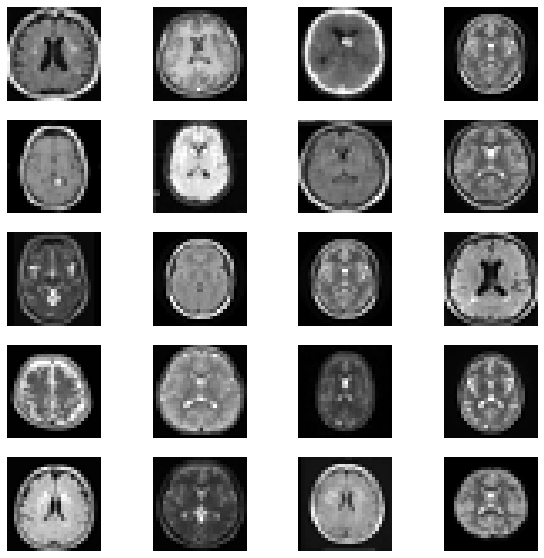

In [667]:
x,y = cs_images('/kaggle/input/brain-mri-images-for-brain-tumor-detection/',classes)

In [668]:
x.shape

(253, 28, 28, 1)

In [669]:
len(y)

253

In [670]:
#x

In [671]:
y[0:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [672]:
y[245:253]

[1, 1, 1, 1, 1, 1, 1, 1]

In [673]:
y[90:110]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [674]:
#s = pd.Series(y,dtype="category")
s = pd.Series(y)

In [675]:
s

0      0
1      0
2      0
3      0
4      0
      ..
248    1
249    1
250    1
251    1
252    1
Length: 253, dtype: int64

In [676]:
s.value_counts()

1    155
0     98
dtype: int64

In [677]:
s.unique()

array([0, 1])

In [678]:
x_train,x_test,y_train,y_test = train_test_split(x,s,test_size = 0.1,random_state = 1,shuffle = True)

In [679]:
x_train.shape

(227, 28, 28, 1)

In [680]:
len(x_train)

227

In [681]:
x_test.shape

(26, 28, 28, 1)

In [682]:
len(y_train)

227

In [683]:
len(y_test)

26

**CNN MODEL CLASSIFICATION**

In [684]:
from tensorflow.keras.layers import Dropout,BatchNormalization,AveragePooling2D

**LENET**

5 layer- 3 conv+ 2 Pooling

In [685]:
from tensorflow.keras.layers import MaxPool2D
model = Sequential()
#cnn
"""ConvLayer_1"""
model.add(Conv2D(6,activation = "tanh",kernel_size=5,strides = 1,input_shape = (28,28,1),padding = "same"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_2"""
model.add(Conv2D(16,activation = "tanh",kernel_size=5,strides = 1,padding = "valid"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_3"""
model.add(Conv2D(120,activation = "tanh",kernel_size=5,strides = 1,padding = "valid"))
model.add(Flatten())
model.add(Dense(84,activation="tanh"))
#model.add(Dense(500,activation = "tanh"))
model.add(Dense(2,activation = "softmax"))

**CNN model**

In [686]:
"""from tensorflow.keras.layers import MaxPool2D
model = Sequential()
model.add(Conv2D(16,activation = 'relu',kernel_size = 3,input_shape = (32,32,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,activation = 'relu',kernel_size = 3))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))"""

"from tensorflow.keras.layers import MaxPool2D\nmodel = Sequential()\nmodel.add(Conv2D(16,activation = 'relu',kernel_size = 3,input_shape = (32,32,1)))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(32,activation = 'relu',kernel_size = 3))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Flatten())\nmodel.add(Dense(100,activation = 'relu'))\nmodel.add(Dense(2,activation = 'softmax'))"

In [687]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_28 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_29 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_29 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 84)              

**compilation**

In [688]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [689]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 0.7090 - accuracy: 0.6256
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.6960
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.6916
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7004
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7269
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7621
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7269
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7841
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.7841
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.7841


In [690]:
y_pred = np.argmax(model.predict(x_test),axis=1)

In [691]:
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [692]:
y_test[0:5]

67     0
252    1
213    1
243    1
91     0
dtype: int64

In [693]:
_,acc = model.evaluate(x_test,y_pred)

1/1 [==============================] - 0s 113ms/step - loss: 0.2527 - accuracy: 1.0000


In [694]:
_,acc = model.evaluate(x_test,y_test)
acc*100

1/1 [==============================] - 0s 18ms/step - loss: 0.4586 - accuracy: 0.8077


80.7692289352417

In [695]:
print("loss is :",_)

loss is : 0.45862191915512085


In [696]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8076923076923077